In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data_x = pd.read_csv("../archive/exoTrain.csv").iloc[:, 1:]

#https://stackoverflow.com/questions/50087135/convert-dataframe-from-wide-to-long-pandas
#thttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html#pandas.wide_to_long
print(training_data_x.head())
training_data_x["id"] = training_data_x.index
training_data_x = pd.wide_to_long(training_data_x, ["FLUX"], i="id", j="time", sep='.').reset_index().sort_values(['id','time'])
print(training_data_x.head())

    FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
0    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
1   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
3   326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
4 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   

   FLUX.9  FLUX.10  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0  -79.89  -160.17  ...     -78.07    -102.15    -102.15      25.13   
1  -83.97   -73.38  ...      -3.28     -32.21     -32.21     -24.89   
2  436.56   484.39  ...     -71.69      13.31      13.31     -29.89   
3  312.42   323.33  ...       5.71      -3.73      -3.73      30.05   
4 -989.57  -970.88  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42 

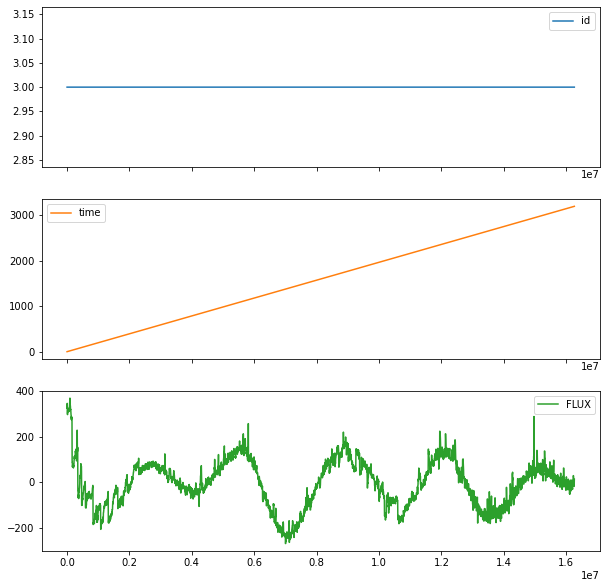

In [3]:
training_data_x[training_data_x['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [ ]:
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters

#13min for exotest
extracted_features = extract_features(training_data_x, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
extracted_features

In [7]:
extracted_features.to_pickle("./TS-Train.pkl")